In [812]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

In [814]:
df = pd.read_csv('customer_shopping_data.csv')
df

,invoice_no,customer_id,gender,age,category,quantity,Price,payment_method,invoice_date,shopping_mall
0,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
1,I139207,C191708,Female,29,Books,1,15.15,Credit Card,28/10/2022,Emaar Square Mall
2,I294687,C300786,Male,65,Books,2,30.30,Debit Card,16/01/2021,Metrocity
3,I174250,C204553,Female,42,Books,5,75.75,Cash,16/12/2022,Metrocity
4,I117291,C134449,Male,46,Books,5,75.75,Credit Card,9/12/22,Zorlu Center
...,...,...,...,...,...,...,...,...,...,...
99452,I180008,C158576,Female,19,NaN,3,121.98,Cash,28/11/2021,Metropol AVM
99453,I117736,C336781,Female,25,NaN,1,300.08,Credit Card,17/01/2022,Mall of Istanbul
99454,I327594,C189864,Male,25,NaN,1,11.73,Cash,6/10/22,Kanyon
99455,I229534,C274652,Female,28,NaN,2,81.32,NaN,7/5/21,Emaar Square Mall


In [816]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3    age            99457 non-null  int64  
 4   category        99448 non-null  object 
 5   quantity        99457 non-null  int64  
 6   Price           99442 non-null  float64
 7   payment_method  99448 non-null  object 
 8   invoice_date    99448 non-null  object 
 9   shopping_mall   99439 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [818]:
df.describe(include='all')

,invoice_no,customer_id,gender,age,category,quantity,Price,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457.000000,99448,99457.000000,99442.000000,99448,99448,99439
unique,99457,99457,2,NaN,14,NaN,NaN,3,797,10
top,I337046,C189076,Female,NaN,Clothing,NaN,NaN,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,NaN,34418,NaN,NaN,44445,159,19939
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.276160,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.218853,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,3.000000,203.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,56.000000,NaN,4.000000,1200.320000,NaN,NaN,NaN


In [820]:
df.rename(columns={
    ' age ':'age',
    'invoice_date': 'datetime'
}, inplace = True)
df

,invoice_no,customer_id,gender,age,category,quantity,Price,payment_method,datetime,shopping_mall
0,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
1,I139207,C191708,Female,29,Books,1,15.15,Credit Card,28/10/2022,Emaar Square Mall
2,I294687,C300786,Male,65,Books,2,30.30,Debit Card,16/01/2021,Metrocity
3,I174250,C204553,Female,42,Books,5,75.75,Cash,16/12/2022,Metrocity
4,I117291,C134449,Male,46,Books,5,75.75,Credit Card,9/12/22,Zorlu Center
...,...,...,...,...,...,...,...,...,...,...
99452,I180008,C158576,Female,19,NaN,3,121.98,Cash,28/11/2021,Metropol AVM
99453,I117736,C336781,Female,25,NaN,1,300.08,Credit Card,17/01/2022,Mall of Istanbul
99454,I327594,C189864,Male,25,NaN,1,11.73,Cash,6/10/22,Kanyon
99455,I229534,C274652,Female,28,NaN,2,81.32,NaN,7/5/21,Emaar Square Mall


In [822]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='raise', format= 'mixed')
df

,invoice_no,customer_id,gender,age,category,quantity,Price,payment_method,datetime,shopping_mall
0,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
1,I139207,C191708,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall
2,I294687,C300786,Male,65,Books,2,30.30,Debit Card,2021-01-16,Metrocity
3,I174250,C204553,Female,42,Books,5,75.75,Cash,2022-12-16,Metrocity
4,I117291,C134449,Male,46,Books,5,75.75,Credit Card,2022-09-12,Zorlu Center
...,...,...,...,...,...,...,...,...,...,...
99452,I180008,C158576,Female,19,NaN,3,121.98,Cash,2021-11-28,Metropol AVM
99453,I117736,C336781,Female,25,NaN,1,300.08,Credit Card,2022-01-17,Mall of Istanbul
99454,I327594,C189864,Male,25,NaN,1,11.73,Cash,2022-06-10,Kanyon
99455,I229534,C274652,Female,28,NaN,2,81.32,NaN,2021-07-05,Emaar Square Mall


In [823]:
df['datetime'].isnull().sum()

9

In [826]:
df['datetime'] = df['datetime'].fillna(method='ffill')

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_20154/1095842324.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['datetime'] = df['datetime'].fillna(method='ffill')


In [828]:
# Filling NaN with Mean value

median_value = df['Price'].median()

df['Price'] = df['Price'].fillna(median_value)

In [830]:
df = df.drop(labels=['invoice_no','customer_id'], axis=1)
df.head()

,gender,age,category,quantity,Price,payment_method,datetime,shopping_mall
0,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
1,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall
2,Male,65,Books,2,30.30,Debit Card,2021-01-16,Metrocity
3,Female,42,Books,5,75.75,Cash,2022-12-16,Metrocity
4,Male,46,Books,5,75.75,Credit Card,2022-09-12,Zorlu Center


In [832]:
df['category'].unique()

array(['Books', 'Book', 'bok', 'Clothing', 'Clothin', 'Cosmetics',
       'Food & Beverage', 'Shoes', 'Shoe', 'Souvenir', 'Technology',
       'Technologi', 'Toys', 'Toy', nan], dtype=object)

In [834]:
df['category'] = df['category'].replace({
    'bok':'Books',
    'Book':'Books',
    'Toy': 'Toys',
    'Clothin': 'Clothing',
    'Shoe':'Shoes',
    'Technologi': 'Technology'    
})

In [836]:
df = df.rename(columns=str.capitalize)
df.head()

,Gender,Age,Category,Quantity,Price,Payment_method,Datetime,Shopping_mall
0,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
1,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall
2,Male,65,Books,2,30.30,Debit Card,2021-01-16,Metrocity
3,Female,42,Books,5,75.75,Cash,2022-12-16,Metrocity
4,Male,46,Books,5,75.75,Credit Card,2022-09-12,Zorlu Center


In [838]:
df['Gender'].value_counts()

Gender
Female    59482
Male      39975
Name: count, dtype: int64

In [840]:
df = df.dropna()
df.head()

,Gender,Age,Category,Quantity,Price,Payment_method,Datetime,Shopping_mall
0,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
1,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall
2,Male,65,Books,2,30.30,Debit Card,2021-01-16,Metrocity
3,Female,42,Books,5,75.75,Cash,2022-12-16,Metrocity
4,Male,46,Books,5,75.75,Credit Card,2022-09-12,Zorlu Center


In [842]:
df = df.sample(n=10000, random_state=7)
df.to_csv('shopping_data.csv', index=False)

In [844]:
df = pd.read_csv('shopping_data.csv')
df

,Gender,Age,Category,Quantity,Price,Payment_method,Datetime,Shopping_mall
0,Female,37,Clothing,5,1500.40,Credit Card,2021-02-21,Istinye Park
1,Male,66,Clothing,3,900.24,Cash,2021-04-01,Mall of Istanbul
2,Female,50,Toys,2,71.68,Cash,2022-12-07,Kanyon
3,Male,64,Cosmetics,5,203.30,Cash,2022-02-03,Zorlu Center
4,Female,34,Food & Beverage,2,10.46,Cash,2021-08-04,Emaar Square Mall
...,...,...,...,...,...,...,...,...
9995,Female,33,Clothing,3,900.24,Debit Card,2022-11-19,Istinye Park
9996,Male,30,Food & Beverage,4,20.92,Cash,2021-06-15,Emaar Square Mall
9997,Male,19,Cosmetics,1,40.66,Cash,2023-10-02,Metropol AVM
9998,Female,66,Clothing,2,600.16,Cash,2021-02-10,Mall of Istanbul


In [634]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [638]:
df['Month'] = df['Datetime'].dt.month_name()
df.head()

,Gender,Age,Category,Quantity,Price,Payment_method,Datetime,Shopping_mall,Month
0,Female,37,Clothing,5,1500.40,Credit Card,2021-02-21,Istinye Park,February
1,Male,66,Clothing,3,900.24,Cash,2021-04-01,Mall of Istanbul,April
2,Female,50,Toys,2,71.68,Cash,2022-12-07,Kanyon,December
3,Male,64,Cosmetics,5,203.30,Cash,2022-02-03,Zorlu Center,February
4,Female,34,Food & Beverage,2,10.46,Cash,2021-08-04,Emaar Square Mall,August


In [520]:
from feature_engine.outliers import OutlierTrimmer
pipeline = Pipeline([
    ('out_trim', OutlierTrimmer(capping_method='iqr',
                               fold=1.5,
                               tail='both',
                               variables=['Price']))
])
df_without_outlier_price = pipeline.fit_transform(df)
df_without_outlier_price

,Gender,Age,Category,Quantity,Price,Payment_method,Datetime,Shopping_mall
0,Female,37,Clothing,5,1500.40,Credit Card,2021-02-21,Istinye Park
1,Male,66,Clothing,3,900.24,Cash,2021-04-01,Mall of Istanbul
2,Female,50,Toys,2,71.68,Cash,2022-12-07,Kanyon
3,Male,64,Cosmetics,5,203.30,Cash,2022-02-03,Zorlu Center
4,Female,34,Food & Beverage,2,10.46,Cash,2021-08-04,Emaar Square Mall
...,...,...,...,...,...,...,...,...
9995,Female,33,Clothing,3,900.24,Debit Card,2022-11-19,Istinye Park
9996,Male,30,Food & Beverage,4,20.92,Cash,2021-06-15,Emaar Square Mall
9997,Male,19,Cosmetics,1,40.66,Cash,2023-10-02,Metropol AVM
9998,Female,66,Clothing,2,600.16,Cash,2021-02-10,Mall of Istanbul


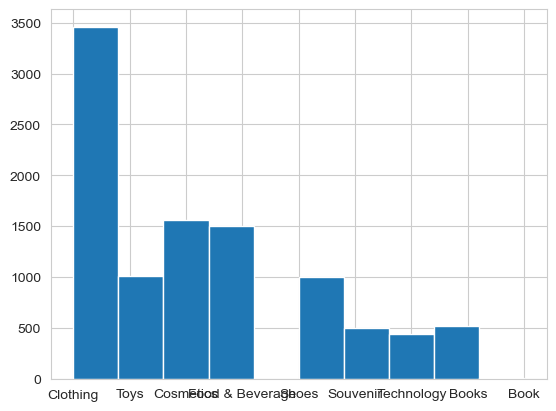

In [668]:
plt.hist(data=df,x='Category')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 89.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 94.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 94.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 81.2% of the p

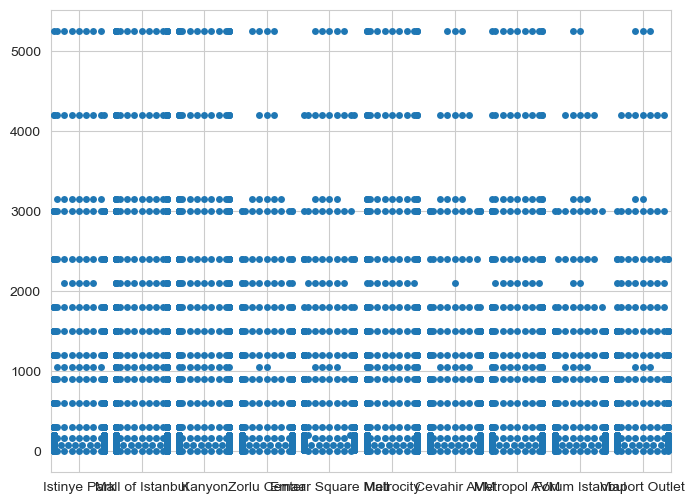

In [808]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
#plt.scatter(data=mall_by_pay_type, x='Shopping_mall', y='count')
sns.swarmplot(data=df, x='Shopping_mall', y='Price')
plt.show()

In [800]:
mall_by_pay_type = pd.DataFrame(df.groupby(['Shopping_mall'])['Gender'].value_counts().reset_index())
mall_by_pay_type

,Shopping_mall,Gender,count
0,Cevahir AVM,Female,308
1,Cevahir AVM,Male,192
2,Emaar Square Mall,Female,293
3,Emaar Square Mall,Male,207
4,Forum Istanbul,Female,289
5,Forum Istanbul,Male,185
6,Istinye Park,Female,586
7,Istinye Park,Male,403
8,Kanyon,Female,1110
9,Kanyon,Male,815


In [802]:
grouped = mall_by_pay_type.groupby(['Shopping_mall'])['count'].sum()
grouped

Shopping_mall
Cevahir AVM           500
Emaar Square Mall     500
Forum Istanbul        474
Istinye Park          989
Kanyon               1925
Mall of Istanbul     2090
Metrocity            1508
Metropol AVM         1016
Viaport Outlet        486
Zorlu Center          512
Name: count, dtype: int64

In [ ]:
fig = px.box(total_sale_per_year, x="Year", y="Quantity", points='all')
fig.show()

In [846]:
# Works
fig = px.scatter(qsale_per_mall_year, x="Shopping_mall", y="Quantity", 
                 animation_frame="Year", 
                 size="Quantity",
                 color="Quantity", hover_name="Shopping_mall",
            )
fig.show()

In [ ]:
# Works
fig = px.scatter(tot_sale_per_cat_per_mon, x="Category", y="Quantity", 
                 animation_frame="Month", 
                 size="Quantity",size_max=55, 
                 color="Category", hover_name="Year"               
            )
fig.show()

In [ ]:
# Works
fig = px.bar(total_cust_per_mall, x='Shopping_mall', y='Gender')
fig.show()

In [ ]:
# Works
fig = px.scatter(best_perform_mall, x="Category", y="Gender", color="Category", size='Gender')
fig.show()

In [ ]:
# Works
fig = px.histogram(spend_by_age_on_cat, x="Age", color="Category", facet_col='Gender')
fig.show()

In [ ]:
# Matplot-Scatter
fig, axes = plt.subplots(figsize=(10,9))
plt.scatter(data=sales_per_agegrp, x='Age', y='Price')

plt.show()

In [ ]:
# Bar chart on total spend on each category

plt.figure(figsize=(10,5))
plt.bar(x=total_spend_on_cat['category'], height=total_spend_on_cat['price'])
plt.show()

In [ ]:
fig = px.scatter(total_spend_per_qcat, x="category", y="quantity",
                 size="quantity",size_max=55,
                 color="category", hover_data='price'        
            )
fig.show()

In [ ]:
sales_diff_per_mall_overyr.plot(kind='hist', y=['quantity_21','quantity_22','quantity_23'], bins=50, stacked=False, figsize=(10,6))
plt.show()